In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [3]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=199, random_state=42).fit(X_train_pca)
silhouette_score(X_train_pca, kmeans.labels_)

0.14413223

In [21]:
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

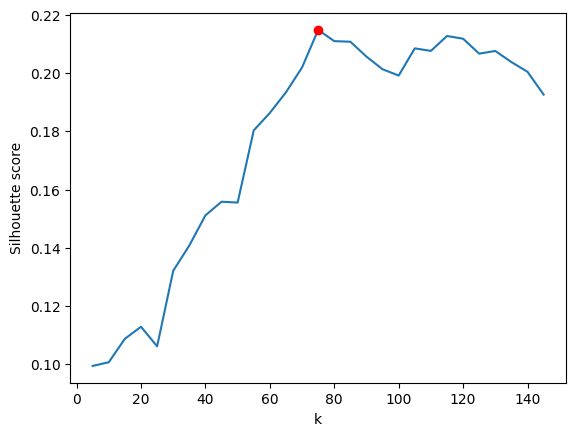

In [34]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores=[silhouette_score(X_train_pca,model.labels_) for model in kmeans_per_k]
best_index=np.argmax(silhouette_scores)
best_k=k_range[best_index]
best_score=silhouette_scores[best_index]

plt.plot(k_range,silhouette_scores)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.plot(best_k,best_score,'ro')
plt.show()

In [35]:
print(best_k)
print(best_score)

75
0.21486716


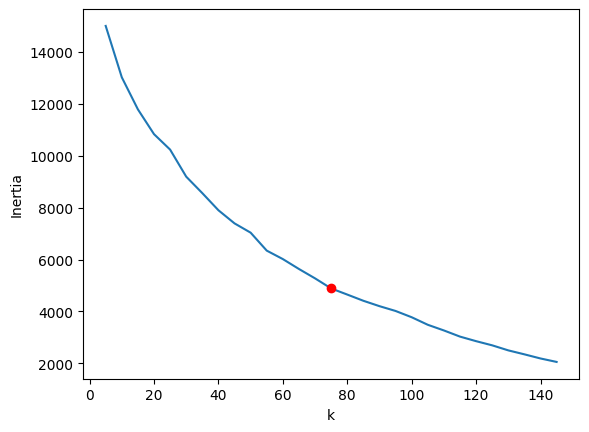

In [36]:
inertias=[model.inertia_ for model in kmeans_per_k]
best_inertia=inertias[best_index]

plt.plot(k_range,inertias)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.plot(best_k,best_inertia,'ro')
plt.show()

In [29]:
print(best_inertia)
print(best_k)

4885.27490234375
75


In [58]:
best_model=kmeans_per_k[best_index]

def plot_faces(faces,labels,n_cols=5):
  faces=faces.reshape(-1,64,64)
  n_rows=(len(faces)-1) // n_cols+1
  for index,(face,label) in enumerate(zip(faces,labels)):
    plt.subplot(n_rows,n_cols,index + 1)
    plt.imshow(face,cmap='gray')
    plt.axis('off')
    plt.title(label)
  plt.show()

cluster 0


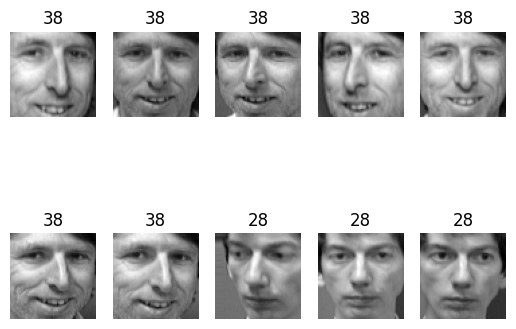

cluster 1


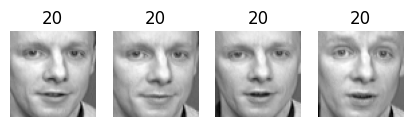

cluster 2


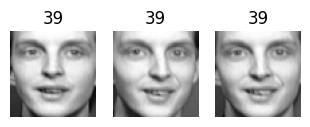

cluster 3


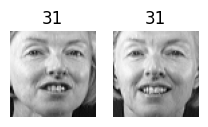

cluster 4


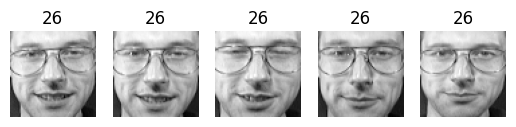

cluster 5


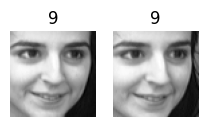

cluster 6


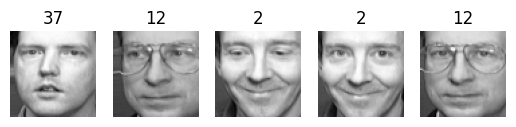

cluster 7


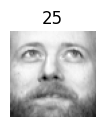

cluster 8


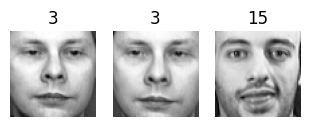

cluster 9


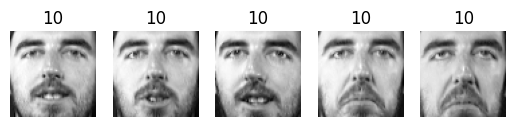

cluster 10


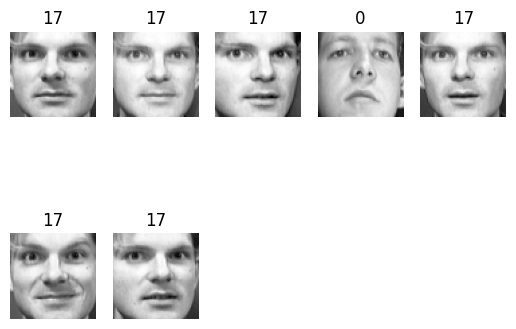

cluster 11


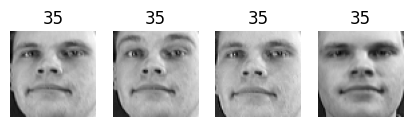

cluster 12


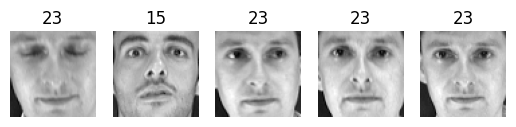

cluster 13


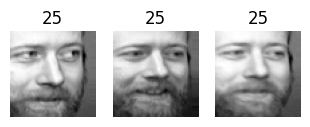

cluster 14


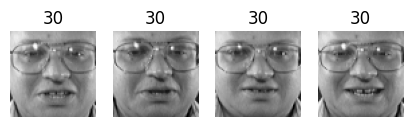

cluster 15


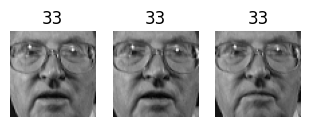

cluster 16


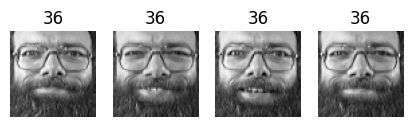

cluster 17


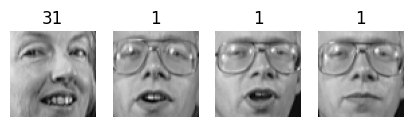

cluster 18


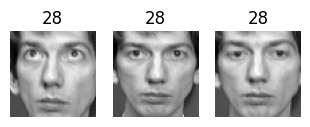

cluster 19


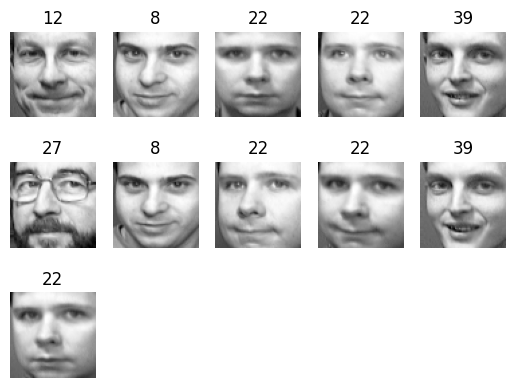

cluster 20


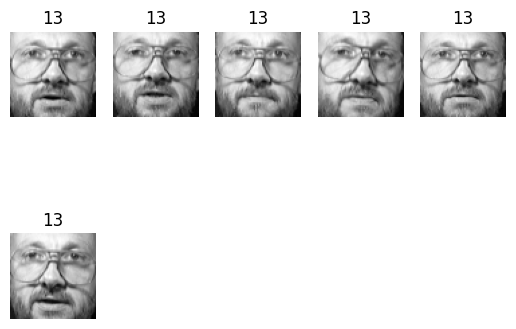

cluster 21


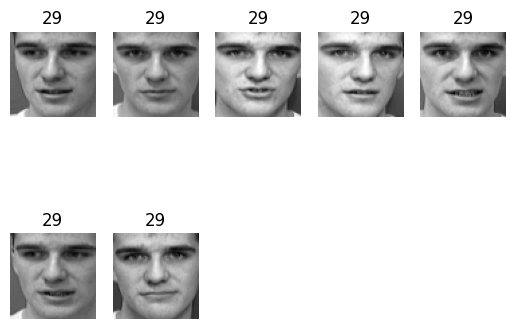

cluster 22


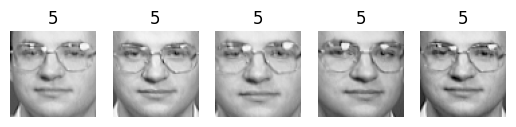

cluster 23


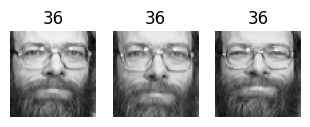

cluster 24


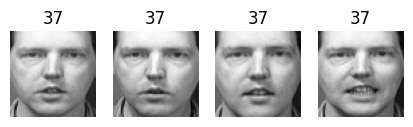

cluster 25


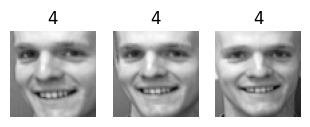

cluster 26


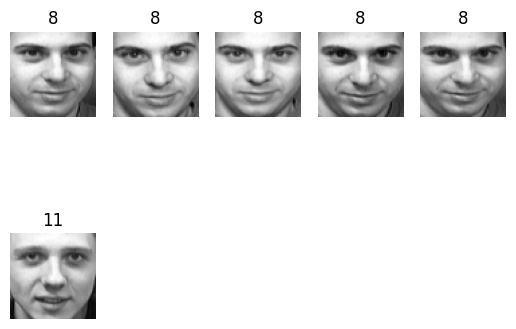

cluster 27


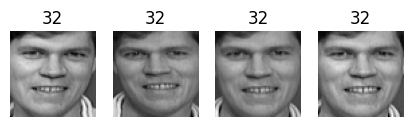

cluster 28


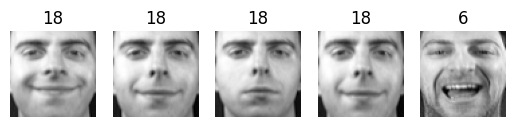

cluster 29


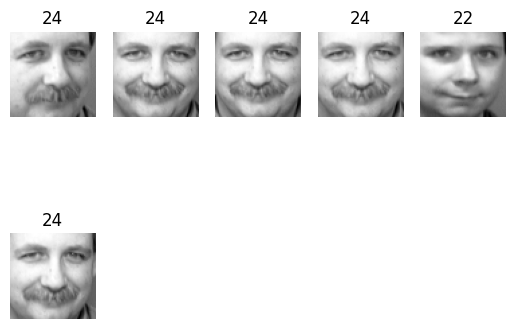

cluster 30


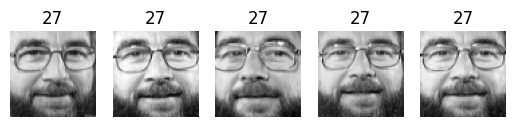

cluster 31


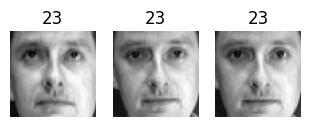

cluster 32


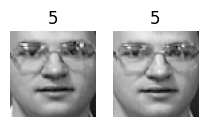

cluster 33


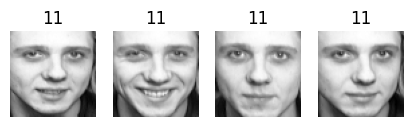

cluster 34


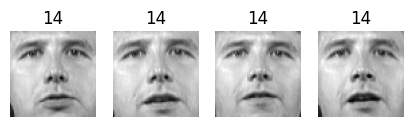

cluster 35


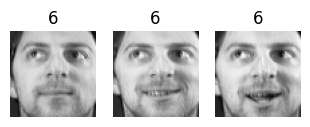

cluster 36


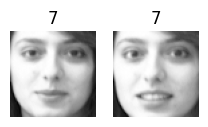

cluster 37


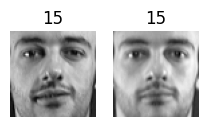

cluster 38


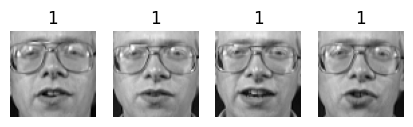

cluster 39


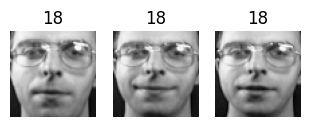

cluster 40


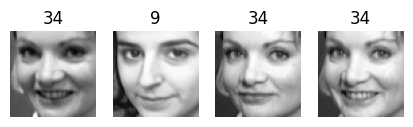

cluster 41


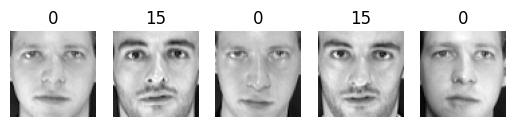

cluster 42


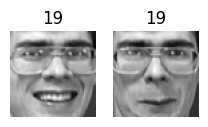

cluster 43


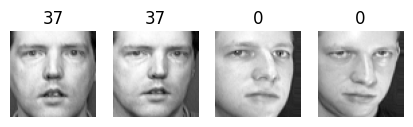

cluster 44


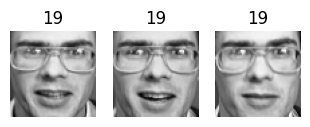

cluster 45


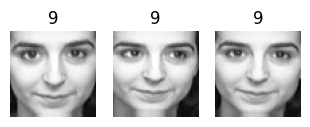

cluster 46


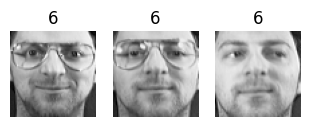

cluster 47


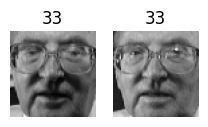

cluster 48


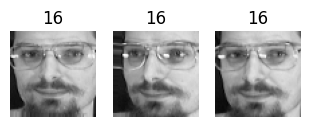

cluster 49


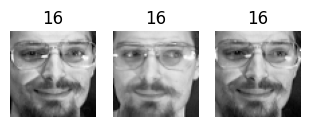

cluster 50


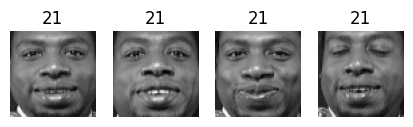

cluster 51


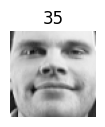

cluster 52


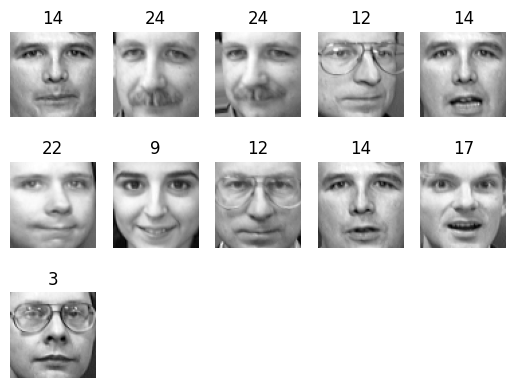

cluster 53


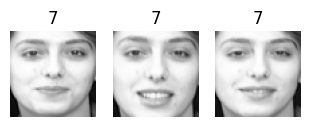

cluster 54


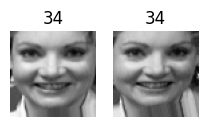

cluster 55


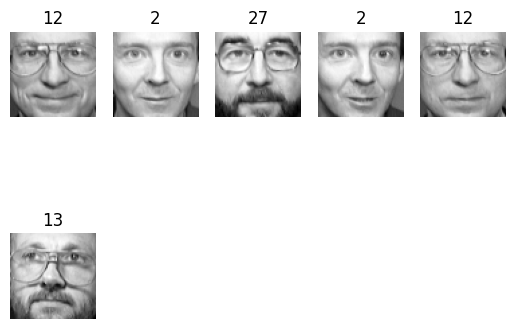

cluster 56


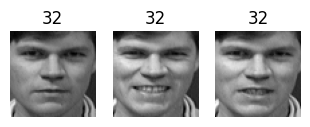

cluster 57


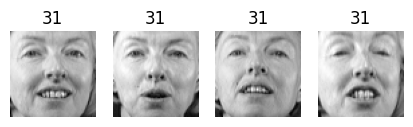

cluster 58


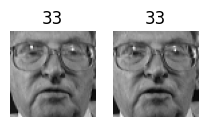

cluster 59


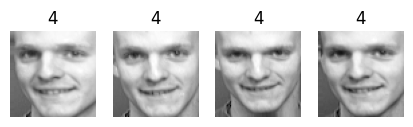

cluster 60


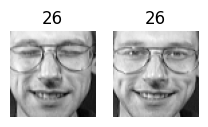

cluster 61


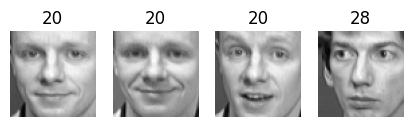

cluster 62


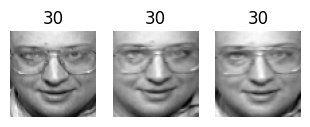

cluster 63


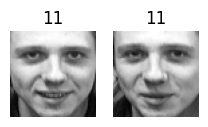

cluster 64


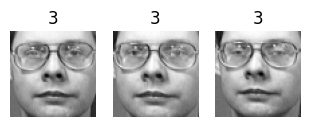

cluster 65


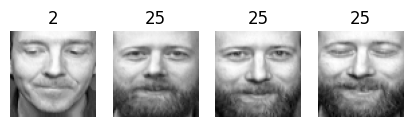

cluster 66


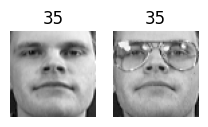

cluster 67


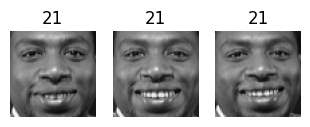

cluster 68


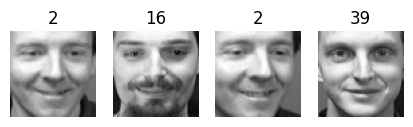

cluster 69


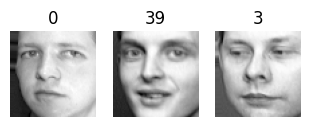

cluster 70


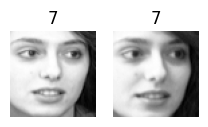

cluster 71


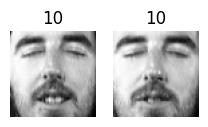

cluster 72


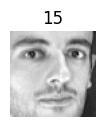

cluster 73


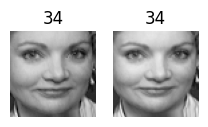

cluster 74


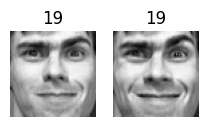

In [59]:
for cluster_id in np.unique(best_model.labels_):
  print('cluster',cluster_id)
  in_cluster=best_model.labels_ == cluster_id
  faces=X_train[in_cluster]
  labels=y_train[in_cluster]
  plot_faces(faces,labels)